# CP 3 Aprendizaje de Máquinas
---
## Árboles de Decisión y Random Forest

### Ejercicio 1: Análisis de dataset Iris

Para demostrar el uso de árboles de decisión y random forest vamos a usar el dataset Iris. 

In [1]:
from sklearn import datasets

iris = datasets.load_iris()

El dataset Iris tiene cuatro características (sepal length, sepal width, petal length, petal width) que se pueden usar para clasificar las flores de Iris en tres especies indicadas como "0", "1", "2" (setosa, versicolor, virginica )

In [2]:
import pandas as pd

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species_names'] = df.species
df.replace({'species_names':{
            0:iris['target_names'][0],
            1:iris['target_names'][1],
            2:iris['target_names'][2]            
        }}, inplace=True)
df.columns = [item.replace(' (cm)', '') for item in df.columns]
df.head()

,sepal length,sepal width,petal length,petal width,species,species_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


Busquemos la cantidad de elementos que pertenecen a cada una de las clases:

In [3]:
df.species.value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

Procedamos a dividir el dataset en un conjunto de entrenamiento y otro de prueba. Se quiere entrenar usando el 70% del dataset

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, train_size=0.7)

### Ejercicio 2: Decision Tree aplicado a Iris

In [5]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(criterion="entropy")
tree_clf.fit(X_train, y_train)
tree_clf.score(X_test,y_test)

0.9777777777777777

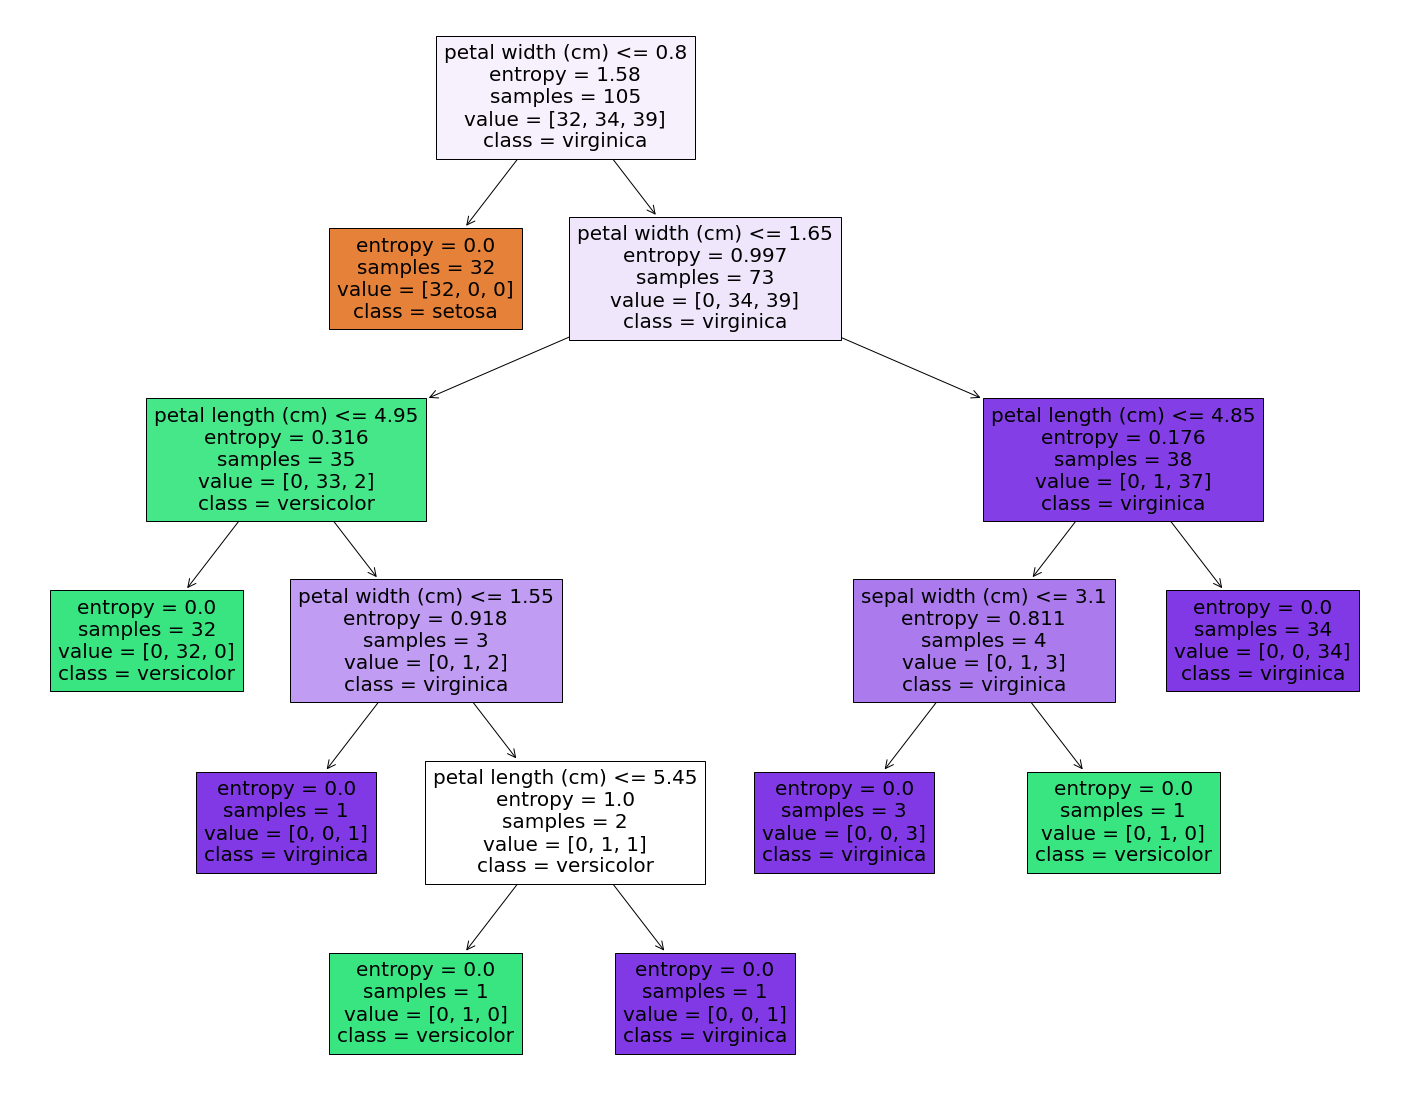

In [7]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(25,20))
_ = plot_tree(tree_clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

### Ejercicio 3: Random Forest aplicado a Iris

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
forest_clf = RandomForestClassifier(criterion="entropy")
forest_clf.fit(X_train, y_train)
forest_clf.score(X_test,y_test)

0.9777777777777777

### Ejercicio 4: Visualizando la Importancia de las Características

Una gran ventaja de los clasificadores basados en árboles es que nos permite hacernos una idea de la importancia relativa de cada carcterística en función de como se dividen los nodos en la fase de entrenamiento. Para ello, tanto el `DecisionTreeClassifier` como el `RandomForestClassifier` de `scikit-learn` proporciona un atributo llamado `feature_importances_`. Esto devuelve un arrray de valores que suman 1. Cuanto mayor sea la puntuación, más importante será la característica. La puntuación se calcula como la reducción total (normalizada) del criterio aportado por esa característica.

In [12]:
import numpy as np
import seaborn as sns

def plot_feature_importance(feature_imp: np.ndarray):
    "Grafica la importancia de cada característica"
    sns.barplot(x=feature_imp, y=feature_imp.index)
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features", pad=15, size=14)

/home/dayany/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Primero, se grafica la importancia de las características según los resultados obtenidos por el árbol de decisión.

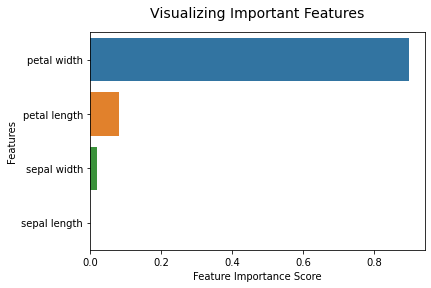

In [13]:
feature_imp = pd.Series(tree_clf.feature_importances_, 
                        index=['sepal length', 'sepal width', 'petal length', 'petal width']).sort_values(ascending=False)
plot_feature_importance(feature_imp)

Y luego se grafica la importancia de las características del Random Forest.

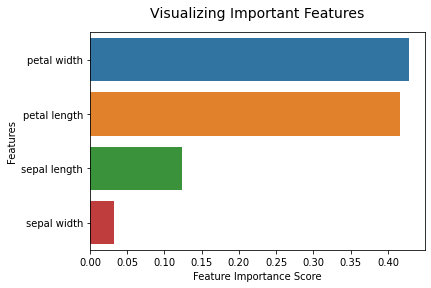

In [14]:
feature_imp = pd.Series(forest_clf.feature_importances_, 
                        index=['sepal length', 'sepal width', 'petal length', 'petal width']).sort_values(ascending=False)
plot_feature_importance(feature_imp)

### Ejercicio 4: Visualizar los espacios de decisión

In [15]:
import seaborn as sns
%matplotlib inline
from matplotlib.colors import ListedColormap

In [16]:
plt.rcParams.update({'figure.titlesize': 'large'})
step = 0.04

def mesh_plot(x: pd.DataFrame, y: pd.Series(), species: pd.Series(), ax: plt.Axes, clf):
    values = species.unique()
    colors = sns.color_palette()[:len(values)]
    xx, yy = np.meshgrid(
        np.arange(x.min() - 0.1, x.max() + 0.1, step),
        np.arange(y.min() - 0.1, y.max() + 0.1, step))
    mesh_predict = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    mesh_predict = mesh_predict.reshape(xx.shape)
    for i in range(len(colors)):
        ax.scatter(x[df.species == values[i]], y[df.species == values[i]], color=colors[i])
        ax.set_xlim(x.min() - 0.2, x.max() + 0.2)
        ax.set_ylim(y.min() - 0.2, y.max() + 0.2)
    ax.pcolormesh(xx, yy, mesh_predict,
        cmap=ListedColormap(sns.color_palette()[:3]), alpha=0.2, shading='auto')

In [17]:
def plot_features(df: pd.DataFrame, feat1: str, feat2: str, clsf, ax: plt.Axes):
    X = df[[feat1, feat2]]
    y = df.species
    fit_clsf = clsf().fit(X, y)
    ax.set(xlabel=feat1, ylabel=feat2)
    mesh_plot(df[feat1], df[feat2], df.species, ax, fit_clsf) 
    

/home/dayany/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/home/dayany/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/home/dayany/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/home/dayany/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


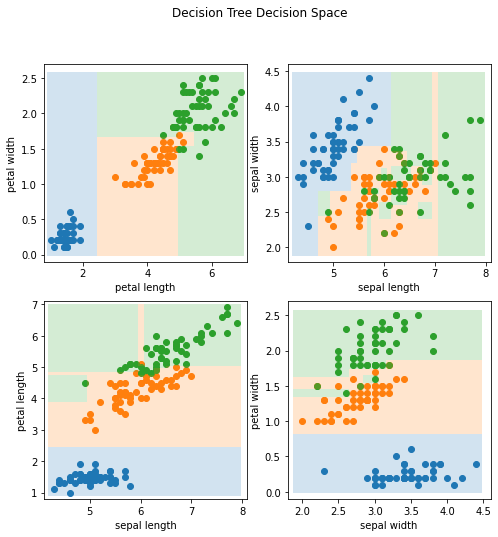

In [18]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 8))
# fig.tight_layout()
fig.suptitle('Decision Tree Decision Space')

plot_features(df, 'petal length', 'petal width', DecisionTreeClassifier, ax1)
plot_features(df, 'sepal length', 'sepal width', DecisionTreeClassifier, ax2)
plot_features(df, 'sepal length', 'petal length', DecisionTreeClassifier, ax3)
plot_features(df, 'sepal width', 'petal width', DecisionTreeClassifier, ax4)

/home/dayany/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/home/dayany/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/home/dayany/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/home/dayany/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


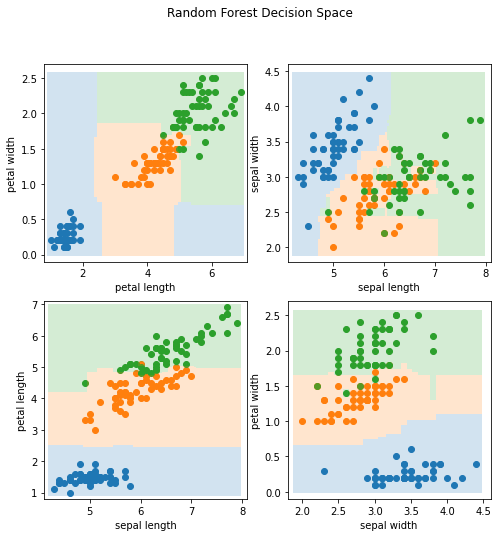

In [19]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 8))
# fig.tight_layout()
fig.suptitle('Random Forest Decision Space')

plot_features(df, 'petal length', 'petal width', RandomForestClassifier, ax1)
plot_features(df, 'sepal length', 'sepal width', RandomForestClassifier, ax2)
plot_features(df, 'sepal length', 'petal length', RandomForestClassifier, ax3)
plot_features(df, 'sepal width', 'petal width', RandomForestClassifier, ax4)

### Ejercicio 6: Profundidad de los árboles

Utilizando un árbol de decisión poca profundidad los resultados obtenidos en el dataset no son buenos. A medida que aumenta la profundidad, el árbol de decisiones identifica mejor las especies de Iris. Esto lo podemos comprobar graficando el espacio de decisión para observar los ejemplos que son clasificados mal.

In [20]:
from typing import List

def plot_dt_by_depth(df: pd.DataFrame, feat1: str, feat2: str, ax: List[plt.Axes]):
  """
  Grafica el espacio de decisión de un árbol de decisión según `feat1` y `feat2`
  usando los datos presentes en un dataframe `df` en los ejes `ax`, que está compuesto
  por 3 ejes.
  """
  # La matriz de características solo está compuesta por las características de interés
  X = df[[feat1, feat2]]
  for idx in range(0, 3):
    # Se crea el árbol de decisión de clasificación con la profundidad determinada, y se realiza el entrenamiento 
    clf = DecisionTreeClassifier(max_depth=idx + 1, random_state=0).fit(X, df.species)
    # Se grafica el espacio de decisión
    mesh_plot(df[feat1], df[feat2], df.species, ax[idx], clf)

Por ejemplo, podemos graficar el árbol teniendo en cuenta dos características: `petal length` y `petal width`.

/home/dayany/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/home/dayany/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/home/dayany/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


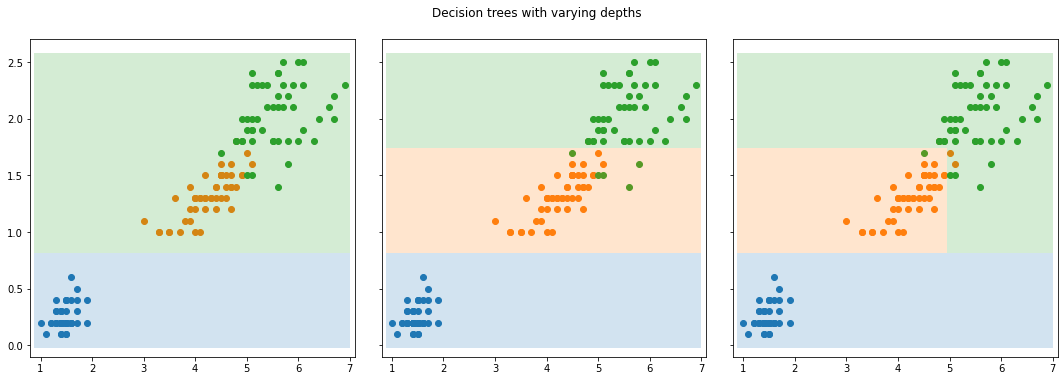

In [21]:
# Se crean los subplots
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(15, 5), squeeze=True)
fig.tight_layout()
fig.suptitle('Decision trees with varying depths', y=1.05)

plot_dt_by_depth(df, 'petal length', 'petal width', ax)

### Ejercicio 5: Decision Tree y Random Forest aplicados al dataset de Rotten Tomatoes 

In [22]:
from pathlib import Path

path_p = Path("txt_sentoken/pos")
path_n = Path("txt_sentoken/neg")

ds_p = list(path_p.iterdir())     # directorio donde están las críticas positivas
ds_n = list(path_n.iterdir())     # directorio donde están las críticas negativas

def convert_file_to_text(file_path: Path) -> str:
    with open(file_path) as f:
        return ''.join(f.readlines())
    
texts_p = [convert_file_to_text(file) for file in ds_p]    # Lista de críticas positivas
texts_n = [convert_file_to_text(file) for file in ds_n]    # Lista de críticas negativas

In [23]:
from sklearn.feature_extraction.text import CountVectorizer 

vectorizer = CountVectorizer()
mt = vectorizer.fit_transform(texts_p + texts_n)
mta = mt.toarray()

y = [1]*1000 + [0]*1000

In [24]:
def experiments(Clsf, iterations: int) -> List[float]:
    rs = []
    # Your code here !
    for _ in range(iterations):
        X_train, X_test, y_train, y_test = train_test_split(mta, y, train_size=0.60)
        clf = Clsf(criterion="entropy")
        clf.fit(X_train, y_train)
        rs.append(clf.score(X_test, y_test))
    #
    return rs

In [25]:
results_dt = experiments(DecisionTreeClassifier,30)
np.mean(results_dt)

0.6385416666666667

In [26]:
results_rf = experiments(RandomForestClassifier,30)
np.mean(results_rf)

0.7972499999999999